# MAKE PMAKE MODEL

In [1]:
import numpy as np

#mpname mpstand pname pmake
with open('pmake_over200_16m.csv') as file:
    csv_data = []
    for line in file.readlines():
        csv_data.append(line.split(','))

In [2]:
mpname = []
mpstand = []
pmake = []

mpname = np.array(csv_data)[:, 0]
mpstand = np.array(csv_data)[:, 1]
pmake = np.array(csv_data)[:, 3]

In [3]:
mpbase = ["" for row in range(len(csv_data))]

for i in range(len(csv_data)):
    mpbase[i] = mpname[i] + mpstand[i]

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
mpbase_tokenizer = Tokenizer()
pmake_tokenizer = Tokenizer()

In [5]:
mpbase_tokenizer.fit_on_texts(mpbase)
pmake_tokenizer.fit_on_texts(pmake)

In [6]:
mpbase_sequences = mpbase_tokenizer.texts_to_sequences(mpbase)
pmake_sequences = pmake_tokenizer.texts_to_sequences(pmake)

In [7]:
train_length = int(len(csv_data) * 0.8)

In [9]:
train_data = np.array(mpbase_sequences)[:train_length]
train_labels = np.array(pmake_sequences)[:train_length]

In [10]:
test_data = np.array(mpbase_sequences)[train_length:]
test_labels = np.array(pmake_sequences)[train_length:]

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension = 14000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=264):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(14000, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(264, activation='softmax'))

Using TensorFlow backend.


In [15]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 127000 samples, validate on 1000 samples
Epoch 1/4
127000/127000 [==============================] - 61s 480us/step - loss: 1.6061 - acc: 0.6469 - val_loss: 1.0604 - val_acc: 0.7250
Epoch 2/4
127000/127000 [==============================] - 62s 484us/step - loss: 0.7973 - acc: 0.7856 - val_loss: 0.8604 - val_acc: 0.7700
Epoch 3/4
127000/127000 [==============================] - 60s 475us/step - loss: 0.6542 - acc: 0.8156 - val_loss: 0.8412 - val_acc: 0.7790
Epoch 4/4
127000/127000 [==============================] - 59s 466us/step - loss: 0.5640 - acc: 0.8364 - val_loss: 0.8886 - val_acc: 0.7670


In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

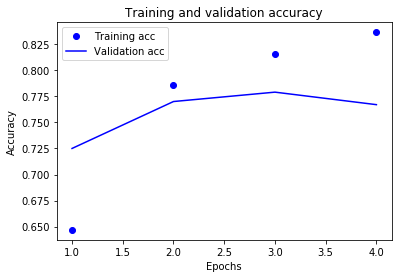

In [19]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

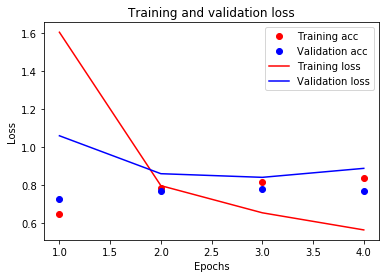

In [20]:
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [21]:
predictions = model.predict(x_test)

In [22]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

32001/32001 [==============================] - 8s 234us/step
[0.8657965094989829, 0.7752570232180245]


In [23]:
from keras.models import load_model
model.save('ML_PMAKE.h5')

In [24]:
reverse_word_map = dict(map(reversed, pmake_tokenizer.word_index.items()))
def already_predict_word(i, n=1):
    p = predictions[i]
    idx = np.flip(np.argsort(p), 0)
    for j in idx[:n]:
        print('"', reverse_word_map[j], " (p={:4.2f}%)".format(100 * p[j]))

In [25]:
already_predict_word(35, 3)

" 씨제이  (p=99.97%)
" 삼립  (p=0.02%)
" 오뚜기  (p=0.00%)
